In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import minimize

In [3]:
#ALPHABETIZED LIST OF COUNTIES
filename = "TX Production - 1993.csv"
file = pd.read_csv(filename)

county_names = []
for j in file["County"]:
    county_names.append(j)

In [4]:
#CREATING 254 SEPARATE ARRAYS FOR PRODUCTION IN EACH COUNTY

totalprod = []

for name in county_names:
    oil_list = []
    
    for year in np.arange(1993,2020): 
        filename = "TX Production - " + str(year) +".csv"
        production = pd.read_csv(filename)
        
        for (county,value) in zip(production["County"],production["Oil (Million BBL)"]):
            if name==county:
                oil_list.append(value)
    
    totalprod.append(oil_list)

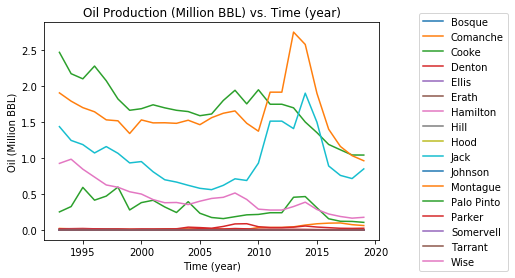

In [5]:
Barnett = (17,46,48,60,69,71,96,108,110,118,125,168,181,183,212,219,248)
for i in Barnett:
    years = np.arange(1993,2020)
    prod = totalprod[i]
    plt.plot(years,prod, label=county_names[i])        
    plt.title("Oil Production (Million BBL) vs. Time (year)")
    plt.xlabel("Time (year)")
    plt.ylabel("Oil (Million BBL)")
    plt.legend(loc='center right', bbox_to_anchor=(1.4, 0.45))

In [6]:
def hubbertmodel(C):
    
    #CREATING FUNCTION THAT RETURNS THE SUM SQUARED ERROR, MINIMIZE SQUARED ERROR    
    def func(Qmaxab):

        #unpack input array
        Qmax, a, b = Qmaxab

        #x data
        years = np.arange(1993,2020)

        #y data (Midland County)
        prod = totalprod[C]

        #predicted y data
        Q = []
        for i in np.arange(0,len(years)):
            q = (a*b*Qmax*math.exp(b*i))/((a + math.exp(b*i))**2)
            Q.append(q)

        #Calculate sum of squared errors
        sum = 0
        for i in np.arange(0,len(years)):
            error = (prod[i] - Q[i])**2
            sum += error

        return sum

    #Returns best Qmnax, a, & b that minimize error
    parameters = minimize(func, (40,1000,.4503), bounds=((0,1e10),(0,1e10),(0,1e10)))
    print("No. of Iterations =", parameters.nit)
    print("Qmax=",parameters.x[0]," a=",parameters.x[1]," b=",parameters.x[2])
    
    #PLOTTING ACTUAL DATA VS. PREDICTED DATA FOR SAME NO. OF YEARS

    #x data
    years = np.arange(1993,2020) 

    #y data
    prod = totalprod[C]

    #predicted y data
    Q = []
    Qmax, a, b = parameters.x
    for i in np.arange(0,len(years)):
        q = (a*b*Qmax*math.exp(b*i))/((a + math.exp(b*i))**2)
        Q.append(q)

    plt.plot(years,Q, label="Predicted",color="b")
    plt.plot(years,prod,'o',label="Actual",color='r')
    plt.title(county_names[C] + " Oil Production (Million BBL) vs. Time (year)")
    plt.xlabel("Time (year)")
    plt.ylabel("Oil Production (Million BBL)")
    plt.legend()
    plt.show()
    
    #EXTENDING PLOT
    #PLOTTING ACTUAL DATA VS. PREDICTED DATA FOR SAME NO. OF YEARS

    #x data
    years = np.arange(1993,2020) 
    years_predicted = np.arange(1993,2060)
    #y data
    prod = totalprod[C]

    #predicted y data
    Q = []
    Qmax, a, b = parameters.x
    for i in np.arange(0,len(years_predicted)):
        q = (a*b*Qmax*math.exp(b*i))/((a + math.exp(b*i))**2)
        Q.append(q)

    plt.plot(years_predicted,Q, label="Predicted",color="b")
    plt.plot(years,prod,'o',label="Actual",color='r')
    plt.title(county_names[C] + " Oil Production (Million BBL) vs. Time (year)")
    plt.xlabel("Time (year)")
    plt.ylabel("Oil Production (Million BBL)")
    plt.legend()
    plt.show()

    #Returns peak year
    tmax = (1/b)*np.log(a)
    if math.isnan(tmax) == True:
        print("Error! Peak year cannot be calculated")
    else:
         print("Peak production will be "+ str(round(np.max(Q))) +" million bbls in " + str(1993 + round(tmax)))

No. of Iterations = 17
Qmax= 27.56001305423002  a= 1000.0284722269939  b= 0.36436088698092134


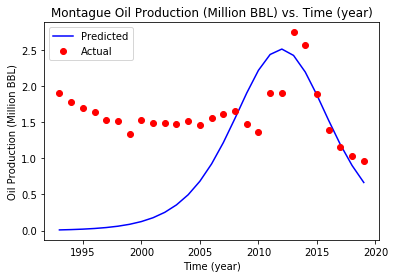

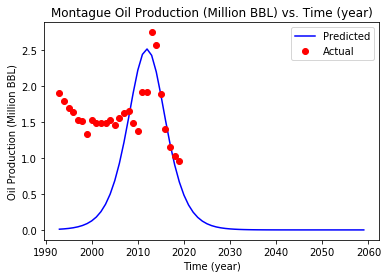

Peak production will be 3 million bbls in 2012


In [7]:
#examples = (6,53,60,62,87,88,91,92,93,94,98,109,112,113,117,138,145,147,155,156,178,179)

hubbertmodel(168)

In [8]:
print(totalprod[168])
print(totalprod[46])

[1.8991240000000005, 1.784513, 1.694575, 1.637083, 1.5251290000000002, 1.511728, 1.3355780000000002, 1.5242040000000001, 1.483128, 1.484564, 1.476776, 1.519802, 1.4579719999999998, 1.555123, 1.616659, 1.648893, 1.477694, 1.3677700000000002, 1.90924, 1.90924, 2.7427479999999997, 2.571124, 1.892554, 1.395122, 1.156215, 1.0281049999999998, 0.9575889999999999]
[0.018271000000000003, 0.012925, 0.011035, 0.012701, 0.010328, 0.007702, 0.007245999999999998, 0.006406, 0.007165, 0.008598999999999999, 0.014496, 0.01071, 0.00701, 0.008611, 0.007528, 0.00758, 0.005508, 0.031002, 0.031757, 0.031757, 0.040708, 0.065215, 0.083152, 0.091776, 0.094474, 0.07082100000000001, 0.058417]
